In [3]:
# !pip install -U scikit-learn
# !pip install -q -U keras-tuner

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("./Compiled DataSheet - Sheet1.csv") # Replace the csv with the path to your data.

In [6]:
df.fillna("", inplace=True)

# 1. Process the data

In [7]:
df.head()

,Drug Name,Active Ingredient,chemical name,SMILES,CAS No,Molecular Weight,LogP,Surface Area,Complexity,Excipients A,Excipients B,Excipients C,Excipients D,Excipients E,Excipients F,Excipients G,Excipients H
0,Auvi-Q (Epinephrine Injection),Epinephrine,"1,2-Benzenediol, 4-[(1R)-1-hydroxy-2-(methylam...",O[C@@H](CNC)C=1C=C(C(=CC1)O)O,51-43-4,183.2,-1.4,72.7,154,sodium chloride,sodium bisulfite,hydrochloric acid,water,,,,
1,Avaclyr (Acyclovir Ophthalmic Ointment),Acyclovir,"2-amino-1,9-dihydro-9-[(2-hydroxyethoxy)methyl...",NC=1NC(C=2N=CN(C2N1)COCCO)=O,59277-89-3,225.2,-1.9,115,308,colloidal silicon dioxide,croscarmellose sodium,magnesium stearate,microcrystalline cellulose,,,,
2,Avagard Foam (Avagard Foam Instant Hand Antise...,Ethyl Alcohol,Ethan-1-ol,C(C)O,64-17-5,46.07,-0.1,20.2,2.8,Behentrimomum chloride,bis-PEG-12 dimethicone,cocoglucoside,dihydroxypropyl PEG-5 linoleammonium,glyceryl oleate,PEG-7 glyceryl cocoate,PEG-200 hydrogenated glyceryl palmate,water
3,Avagard Foam Instant Hand Antiseptic With Mois...,Ethyl Alcohol,Ethan-1-ol,C(C)O,64-17-5,46.07,-0.1,20.2,2.8,Behentrimomum chloride,bis-PEG-12 dimethicone,cocoglucoside,dihydroxypropyl PEG-5 linoleammonium,glyceryl oleate,PEG-7 glyceryl cocoate,PEG-200 hydrogenated glyceryl palmate,water
4,Avagard Lotion (Avagard Lotion Instant Hand An...,Ethyl Alcohol,Ethan-1-ol,C(C)O,64-17-5,46.07,-0.1,20.2,2.8,Beheneth-10,behenyl alcohol,C20-40 pareth-24,cetyl palmitate,diisopropyl dimer dilinoleate,dimethicone,glycerin,polyethylene glycol


## 1.1 Show information of data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451 entries, 0 to 4450
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Drug Name          4451 non-null   object
 1   Active Ingredient  4451 non-null   object
 2   chemical name      4451 non-null   object
 3   SMILES             4451 non-null   object
 4   CAS No             4451 non-null   object
 5   Molecular Weight   4451 non-null   object
 6   LogP               4451 non-null   object
 7   Surface Area       4451 non-null   object
 8   Complexity         4451 non-null   object
 9   Excipients A       4451 non-null   object
 10  Excipients B       4451 non-null   object
 11  Excipients C       4451 non-null   object
 12  Excipients D       4451 non-null   object
 13  Excipients E       4451 non-null   object
 14  Excipients F       4451 non-null   object
 15  Excipients G       4451 non-null   object
 16  Excipients H       4451 non-null   object


In [9]:
df.describe()

,Drug Name,Active Ingredient,chemical name,SMILES,CAS No,Molecular Weight,LogP,Surface Area,Complexity,Excipients A,Excipients B,Excipients C,Excipients D,Excipients E,Excipients F,Excipients G,Excipients H
count,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451
unique,2410,1756,1621,1316,978,950,166,488,568,838,839,748,653,544,498,438,318
top,PlasmaLyte R (Multiple Electrolytes Injection),,,,,,,,,,,,,,,,
freq,9,36,143,295,1058,881,1528,984,983,297,480,844,1200,1689,2171,2615,2978


## 1.2 Format data from one line to many lines based on number of Excipients

In [10]:
X_cols = ['SMILES']

In [11]:
Y_cols = ['Excipients A', 
          'Excipients B', 
          'Excipients C', 
          'Excipients D',
          'Excipients E', 
          'Excipients F', 
          'Excipients G', 
          'Excipients H']

In [12]:
# Transform the data to use only smile and the excipient. Rearranging it in such a way we have only the 
# excipient and repeating the smiles for each excipient.

tranform_data = []
for index, row in df.iterrows():
    for y_col in Y_cols:
        if not row[y_col]:
            continue
        data_point = {}
        for x_col in X_cols:
            data_point[x_col] = row[x_col]
        data_point['excipients'] = row[y_col].strip()
        tranform_data.append(data_point)
            
tranform_data_df = pd.DataFrame(data=tranform_data)

In [13]:
tranform_data_df.head()

,SMILES,excipients
0,O[C@@H](CNC)C=1C=C(C(=CC1)O)O,sodium chloride
1,O[C@@H](CNC)C=1C=C(C(=CC1)O)O,sodium bisulfite
2,O[C@@H](CNC)C=1C=C(C(=CC1)O)O,hydrochloric acid
3,O[C@@H](CNC)C=1C=C(C(=CC1)O)O,water
4,NC=1NC(C=2N=CN(C2N1)COCCO)=O,colloidal silicon dioxide


## 1.3 Encode SMILES using RDKit

In [14]:
import numpy as np

SMILES_CHARS = [' ',
                    '#', '%', '(', ')', '+', '-', '.', '/',
                    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                    '=', '@',
                    'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P',
                    'R', 'S', 'T', 'V', 'X', 'Z',
                    '[', '\\', ']',
                    'a', 'b', 'c', 'e', 'g', 'i', 'l', 'n', 'o', 'p', 'r', 's',
                    't', 'u']
pad_char=' '
pad_min=1
max_len=150


class CharacterTable(object):
    '''
    Given a set of characters:
    + Encode them to a one hot integer representation
    + Decode the one hot integer representation to their character output
    + Decode a vector of probabilities to their character output
    first version by rmcgibbo
    '''

    def __init__(self, chars, maxlen):
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))
        self.maxlen = maxlen

    def encode(self, C, maxlen=None):
        try:
            maxlen = maxlen if maxlen else self.maxlen
            X = np.zeros((maxlen, len(self.chars)))
            for i, c in enumerate(C):
                if i>= maxlen:
                    break
                X[i, self.char_indices[c]] = 1
            return X, True
        except Exception as e:
            print(e)
            return _, False

    def decode(self, X, mode='argmax'):
        if mode == 'argmax':
            X = X.argmax(axis=-1)
        elif mode == 'choice':
            X = np.apply_along_axis(lambda vec: \
                                        np.random.choice(len(vec), 1,
                                                         p=(vec / np.sum(vec))),
                                    axis=-1, arr=X).ravel()
        return str.join('', (self.indices_char[x] for x in X))

chars = sorted(set.union(set(SMILES_CHARS), set(pad_char)))   
character_table = CharacterTable(chars, max_len)

smile_encode, _ = character_table.encode("NC=1NC(C=2N=CN(C2N1)[C@@H]1C[C@@H]([C@H](O1)COP(=S)([O-])O[C@@H]1[C@H](O[C@@H](C1)N1C(NC(C(=C1)C)=O)=O)COP(=S)([O-])O[C@@H]1[C@H](O[C@H](C1)N1C(NC(C(=C1)C)=O)=O)COP(=S)([O-])O[C@@H]1[C@H](O[C@H](C1)N1C(NC(C(=C1)C)=O)=O)COP(=S)([O-])O[C@@H]1[C@@H](O[C@H](C1)N1C=2N=C(NC(C2N=C1)=O)N)COP(=S)([O-])O[C@@H]1[C@@H](O[C@H](C1)N1C(N=C(C=C1)N)=O)COP(=S)([O-])O[C@@H]1[C@@H](O[C@H](C1)N1C=2N=C(NC(C2N=C1)=O)N)CO)OP(=S)(OC[C@H]1O[C@@H](C[C@@H]1OP(=S)(OC[C@H]1[C@H](C[C@H](O1)N1C(NC(C(=C1)C)=O)=O)OP(=S)([O-])OC[C@H]1O[C@@H](C[C@@H]1OP(=S)([O-])OC[C@@H]1O[C@H](C[C@@H]1OP(=S)([O-])OC[C@H]1O[C@@H](C[C@H]1OP(=S)([O-])OC[C@H]1O[C@@H](C[C@@H]1OP(=S)([O-])OC[C@H]1O[C@H](C[C@@H]1OP(=S)([O-])OC[C@H]1O[C@H](C[C@@H]1OP(=S)([O-])OC[C@H]1O[C@@H](C[C@@H]1OP(=S)([O-])OC[C@H]1O[C@H](C[C@@H]1OP(=S)([O-])OC[C@@H]1O[C@H](C[C@@H]1OP(=S)([O-])OC[C@@H]1O[C@H](C[C@@H]1OP(=S)([O-])OC[C@H]1O[C@H](C[C@H]1OP(=S)([O-])OC[C@H]1O[C@@H](C[C@@H]1O)N1C=2N=C(NC(C2N=C1)=O)N)N1C(N=C(C=C1)N)=O)N1C=2N=C(NC(C2N=C1)=O)N)N1C(NC(C(=C1)C)=O)=O)N1C(NC(C(=C1)C)=O)=O)N1C(N=C(C=C1)N)=O)N1C(NC(C(=C1)C)=O)=O)N1C(NC(C(=C1)C)=O)=O)N1C(N=C(C=C1)N)=O)N1C(NC(C(=C1)C)=O)=O)N1C(NC(C(=C1)C)=O)=O)N1C(N=C(C=C1)N)=O)[O-])N1C(N=C(C=C1)N)=O)[O-])=O.[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+]", maxlen=max_len)
print("smile_encode: ", smile_encode)
print("smile_encode shape: ", smile_encode.shape)
print("decode: ", character_table.decode(smile_encode))

smile_encode:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
smile_encode shape:  (150, 56)
decode:  NC=1NC(C=2N=CN(C2N1)[C@@H]1C[C@@H]([C@H](O1)COP(=S)([O-])O[C@@H]1[C@H](O[C@@H](C1)N1C(NC(C(=C1)C)=O)=O)COP(=S)([O-])O[C@@H]1[C@H](O[C@H](C1)N1C(NC(C(=


## 1.4 Encode excipients

In [15]:
from sklearn import preprocessing

# Encode target labels with value between 0 and n_classes-1.
excipients_encoder = preprocessing.LabelEncoder()
excipients_encoder.fit(list(tranform_data_df.excipients))

LabelEncoder()

## 1.5 Create data

In [ ]:
# Only keep SMILES as input variable

X_list = []
Y_list = []
for index, row in tranform_data_df.iterrows():
    smile = row['SMILES'].strip()
    if not smile:
        continue 
    smile_encode, is_ok = character_table.encode(smile)
    if not is_ok:
        continue

    X_list.append(smile_encode)
    Y_list.append(excipients_encoder.transform([row['excipients']])[0])


In [17]:
print("Total data points: ", len(X_list))

Total data points:  21928


In [18]:
X_list[0].shape #Shape of each element of SMILES

(150, 56)

In [19]:
# We combine all element or datapoint into one matrix by stacking them for the input variable (smile)

X = np.stack(X_list, axis=0)
print("X shape: ", X.shape)

X shape:  (21928, 150, 56)


In [20]:
# We combine all element or datapoint into one matrix by stacking them for the label (the excipients)

y = np.stack(Y_list, axis=0).reshape((len(Y_list), 1))
print("y shape: ", y.shape)

y shape:  (21928, 1)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("Y train shape: ", y_train.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (14691, 150, 56)
X test shape:  (7237, 150, 56)
Y train shape:  (14691, 1)
Y test shape:  (7237, 1)


# 2. Create machine learning models

In [23]:
import numpy as np
import tensorflow as tf #Google Colab 
from tensorflow import keras

# Tuning parameter

In [26]:
input_shape = (150, 56)
output_classes = len(excipients_encoder.classes_)

def model_builder(hp):
    """
    Build machine learning model for tuning parameters.
    """
    model = keras.Sequential() # Create a sequential model (neural network)
    model.add(keras.layers.Flatten(input_shape=input_shape)) # add the layers of the model

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(output_classes))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    return model

In [27]:
import kerastuner as kt
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/intro_to_kt/tuner0.json
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 160 and the optimal learning rate for the optimizer
is 0.001.



In [28]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
368/368 [==============================] - 2s 5ms/step - loss: 6.7774 - accuracy: 0.0347 - val_loss: 6.0810 - val_accuracy: 0.0436
Epoch 2/50
368/368 [==============================] - 1s 4ms/step - loss: 5.4578 - accuracy: 0.0564 - val_loss: 5.7542 - val_accuracy: 0.0493
Epoch 3/50
368/368 [==============================] - 1s 4ms/step - loss: 4.6594 - accuracy: 0.0833 - val_loss: 5.6200 - val_accuracy: 0.0521
Epoch 4/50
368/368 [==============================] - 1s 4ms/step - loss: 3.9866 - accuracy: 0.1111 - val_loss: 5.6266 - val_accuracy: 0.0504
Epoch 5/50
368/368 [==============================] - 2s 4ms/step - loss: 3.4912 - accuracy: 0.1288 - val_loss: 5.6567 - val_accuracy: 0.0487
Epoch 6/50
368/368 [==============================] - 1s 4ms/step - loss: 3.2021 - accuracy: 0.1322 - val_loss: 5.7689 - val_accuracy: 0.0480
Epoch 7/50
368/368 [==============================] - 2s 4ms/step - loss: 3.0001 - accuracy: 0.1340 - val_loss: 5.8504 - val_accuracy: 0.0371
Epoch 

In [29]:
## ADD softmax in last layer to normalization probability of prediction class
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

In [30]:
def evaluation_model(predictions, X_test, number_of_correct_excipient=4):
    """
    Calculate model accuracy.
    Get top 10 elments with highest probability and compare with list of excipients in test set.
    If there are 4 cases of predictions in list of excipient then count it is correct prediction else not.
    """
    number_of_correct_cases = 0
    
    for y_pred, x_test in zip(predictions, X_test):
        top_10_prediction = set(excipients_encoder.inverse_transform(y_pred.argsort()[-10:][::-1]))
        true_values = set(tranform_data_df[tranform_data_df.SMILES == character_table.decode(x_test).strip()]['excipients'].unique())
        
        if len(top_10_prediction & true_values) >= number_of_correct_excipient:
            number_of_correct_cases += 1
        
    return number_of_correct_cases / len(X_test)

#Running a prediction and using the custom evaluation model to evaluate the predicted outcome
model_accuracy_vs_number_of_correct = []
for i in range(3, 11):
    model_accuracy_vs_number_of_correct.append({
        "number_of_correct_excipient": i,
        "model_accuracy": evaluation_model(predictions, X_test, i)
    })

In [32]:
model_accuracy_vs_number_of_correct_df = pd.DataFrame(model_accuracy_vs_number_of_correct)

In [33]:
model_accuracy_vs_number_of_correct_df

,number_of_correct_excipient,model_accuracy
0,3,0.893050
1,4,0.856294
2,5,0.800193
3,6,0.740638
4,7,0.672378
5,8,0.589194
6,9,0.495371
7,10,0.456681


<AxesSubplot:xlabel='number_of_correct_excipient'>

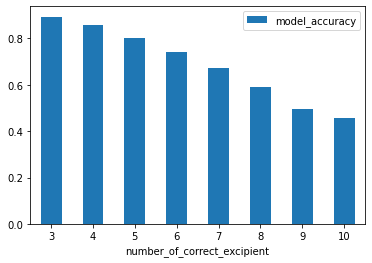

In [37]:
model_accuracy_vs_number_of_correct_df.plot.bar(x="number_of_correct_excipient", y='model_accuracy', rot=0)

In [38]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/excipient_model_v3')

INFO:tensorflow:Assets written to: saved_model/excipient_model_v3/assets


In [39]:
load_model = tf.keras.models.load_model('saved_model/excipient_model_v3')

In [40]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8400)              0         
_________________________________________________________________
dense (Dense)                (None, 160)               1344160   
_________________________________________________________________
dense_1 (Dense)              (None, 2298)              369978    
Total params: 1,714,138
Trainable params: 1,714,138
Non-trainable params: 0
_________________________________________________________________
